In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST dataset from TensorFlow datasets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Check the shape of the data
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


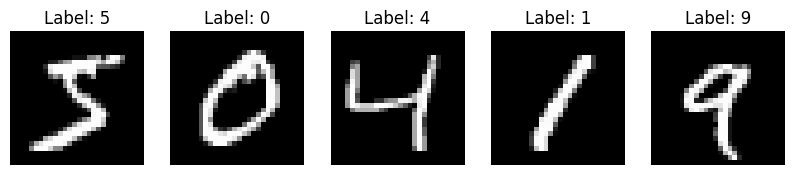

In [ ]:
# Plot the first 5 training images with their labels
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


In [ ]:
# Normalize pixel values from [0, 255] to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(28, 28)),          # Explicit input layer
    layers.Flatten(),                      # Now flatten without input_shape
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8703 - loss: 0.4491 - val_accuracy: 0.9665 - val_loss: 0.1201
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9613 - loss: 0.1283 - val_accuracy: 0.9698 - val_loss: 0.1033
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9738 - loss: 0.0877 - val_accuracy: 0.9750 - val_loss: 0.0828
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9816 - loss: 0.0618 - val_accuracy: 0.9780 - val_loss: 0.0744
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9856 - loss: 0.0480 - val_accuracy: 0.9800 - val_loss: 0.0716


In [ ]:
model.save('digitRec.keras')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


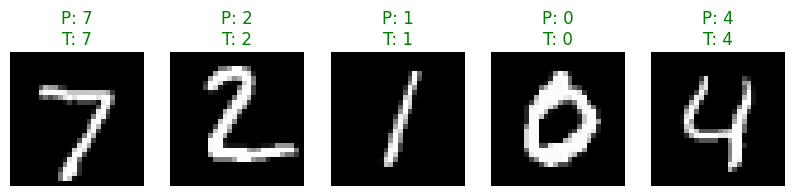

In [ ]:
predictions = model.predict(test_images)

# Visualize first 5 test images with predictions
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"P: {predicted_label}\nT: {true_label}", color=color)
    plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.1077
Test accuracy: 0.9755
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


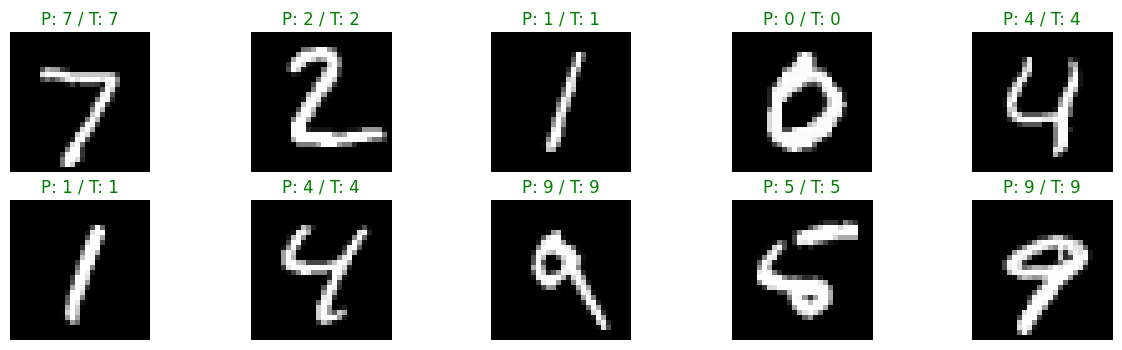

In [ ]:
# 1. Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# 2. Predict on test images
predictions = model.predict(test_images)

# 3. Show first 10 test images with predicted & true labels
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"P: {predicted_label} / T: {true_label}", color=color)
    plt.axis('off')
plt.show()
